In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel('Portfolio Return Data Yearly.xlsx')

print(df)


    Date  Mulvaney Capital  Chesepeake Captial      AAPL      AMZN      MSFT  \
0   1999            0.0109              0.0330  1.086783  0.759411  0.576403   
1   2000            0.2451              0.0524 -0.778918 -1.073069 -0.829234   
2   2001            0.0669             -0.0799  0.577605  0.254382  0.518759   
3   2002            0.1937              0.1108 -0.305516  0.818570 -0.156824   
4   2003            0.2928              0.2307  0.467934  1.122446  0.108075   
5   2004           -0.0010              0.0484  1.184971 -0.081928  0.101910   
6   2005            0.3234             -0.0069  0.879475  0.126279  0.000831   
7   2006            0.2194              0.1088  0.238324 -0.095239  0.168840   
8   2007           -0.2314              0.0226  0.919658  0.980323  0.215126   
9   2008            1.0887              0.1539 -0.669397 -0.375576 -0.470191   
10  2009           -0.0590              0.0040  0.962334  1.096040  0.542341   
11  2010            0.3490              

In [12]:
import numpy as np

for column in df.columns[1:-1]:
    std_dev = df[column].std()
    print(f"Standard Deviation of {column}: {std_dev}")


Standard Deviation of Mulvaney Capital: 0.3402137026609317
Standard Deviation of Chesepeake Captial: 0.10242539278399923
Standard Deviation of AAPL: 0.5105593713591021
Standard Deviation of AMZN: 0.5337830284953746
Standard Deviation of MSFT: 0.3361021272763591
Standard Deviation of BRK-B: 0.158595578386145
Standard Deviation of GPK: 0.6205173876083824
Standard Deviation of XOM: 0.215227515709855
Standard Deviation of ^GSPC: 0.17359518785155711


In [19]:

std_dev_dict = {
    'Mulvaney Capital': 0.3402137026609317,
    'Chesepeake Captial': 0.10242539278399923,
    'AAPL': 0.5105593713591021,
    'AMZN': 0.5337830284953746,
    'MSFT': 0.3361021272763591,
    'BRK-B': 0.158595578386145,
    'GPK': 0.6205173876083824,
    'XOM': 0.215227515709855,
    '^GSPC': 0.17359518785155711
}

std_dev_df = pd.DataFrame.from_dict(std_dev_dict, orient='index', columns=['Standard Deviation'])

print(std_dev_df)


fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
ax.axis('tight')

plt.savefig('std_dev.jpg')
plt.close()

                    Standard Deviation
Mulvaney Capital              0.340214
Chesepeake Captial            0.102425
AAPL                          0.510559
AMZN                          0.533783
MSFT                          0.336102
BRK-B                         0.158596
GPK                           0.620517
XOM                           0.215228
^GSPC                         0.173595


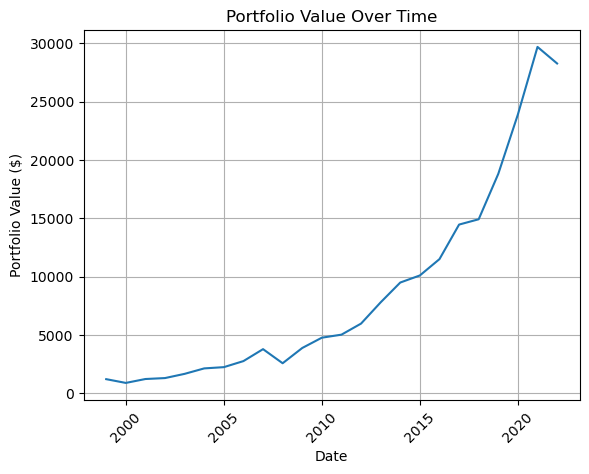

In [2]:
selected_columns = df[['Chesepeake Captial', 'AAPL', 'AMZN', 'MSFT', 'BRK-B', 'GPK']]

weights = [0.15,.15,.1,.1,.4,.1]

weighted_columns = selected_columns.multiply(weights)

cc_portfolio_returns = weighted_columns.sum(axis=1)

df['Portfolio'] = cc_portfolio_returns

initial_investment = 1000

cc_portfolio_value = initial_investment * (1 + cc_portfolio_returns).cumprod()

plt.plot(df['Date'], cc_portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

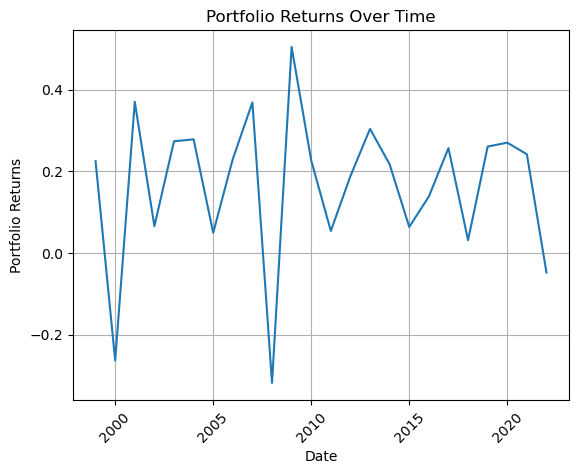

In [3]:

plt.plot(df['Date'], df['Portfolio'])
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
plt.title('Portfolio Returns Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

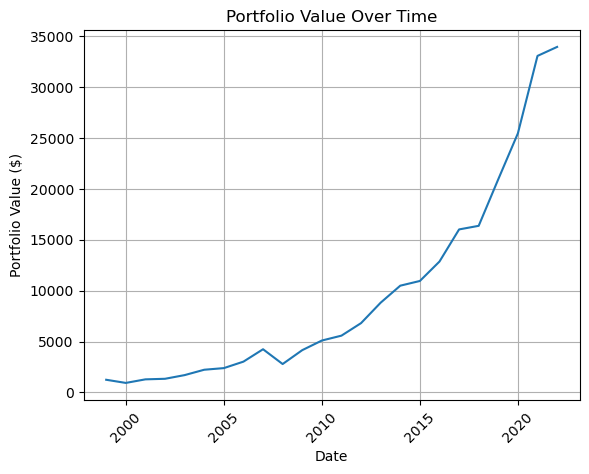

In [4]:
selected_column = df[['XOM', 'AAPL', 'AMZN', 'MSFT', 'BRK-B', 'GPK']]

weights = [0.15,.15,.1,.1,.4,.1]

weighted_column = selected_column.multiply(weights)

xom_portfolio_return = weighted_column.sum(axis=1)

df['Portfolio'] = xom_portfolio_return

initial_investment = 1000

xom_portfolio_value = initial_investment * (1 + xom_portfolio_return).cumprod()

plt.plot(df['Date'], xom_portfolio_value)
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

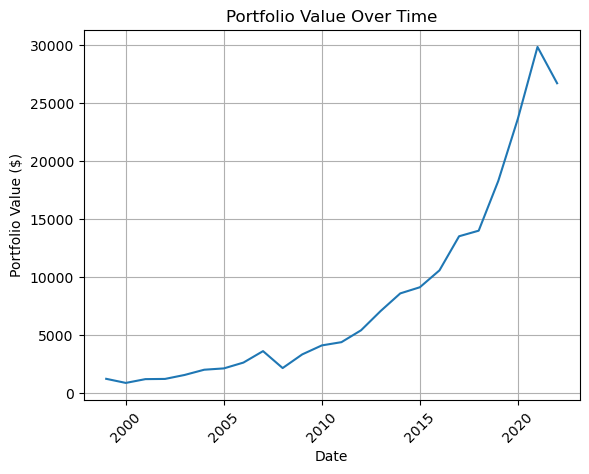

In [5]:
selected_column_mrk = df[['^GSPC', 'AAPL', 'AMZN', 'MSFT', 'BRK-B', 'GPK']]

weights = [0.15,.15,.1,.1,.4,.1]

weighted_column_mrk = selected_column_mrk.multiply(weights)

portfolio_return_mrk = weighted_column_mrk.sum(axis=1)

df['Portfolio'] = portfolio_return_mrk

initial_investment = 1000

portfolio_value_mrk = initial_investment * (1 + portfolio_return_mrk).cumprod()

plt.plot(df['Date'], portfolio_value_mrk)
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [6]:
print("Chesepeake Capital Portfolio") 
print(cc_portfolio_returns)
print("XOM Portfolio")
print(xom_portfolio_return)
print("Market Portfolio")
print(portfolio_return_mrk)

Chesepeake Capital Portfolio
0     0.224974
1    -0.263235
2     0.370382
3     0.065882
4     0.273770
5     0.278551
6     0.049681
7     0.230338
8     0.369046
9    -0.318125
10    0.504936
11    0.226672
12    0.054123
13    0.188519
14    0.304185
15    0.217275
16    0.063788
17    0.138487
18    0.257066
19    0.031479
20    0.260866
21    0.270359
22    0.242004
23   -0.047795
dtype: float64
XOM Portfolio
0     0.244338
1    -0.249023
2     0.374953
3     0.043023
4     0.269626
5     0.310215
6     0.071473
7     0.266273
8     0.402526
9    -0.342534
10    0.489194
11    0.227287
12    0.094100
13    0.220774
14    0.294889
15    0.189295
16    0.044087
17    0.174301
18    0.245410
19    0.022058
20    0.279886
21    0.215119
22    0.298790
23    0.026703
dtype: float64
Market Portfolio
0     0.249362
1    -0.283438
2     0.364826
3     0.014405
4     0.276473
5     0.285130
6     0.055942
7     0.233923
8     0.372767
9    -0.401429
10    0.541511
11    0.230881
12    0.06

In [20]:
cc_volatility = cc_portfolio_returns.std()
xom_volatility = xom_portfolio_return.std()
market_volatility = portfolio_return_mrk.std()

# Print the volatilities
print("Chesepeake Capital Portfolio Volatility:", cc_volatility)
print("XOM Portfolio Volatility:", xom_volatility)
print("Market Portfolio Volatility:", market_volatility)

Chesepeake Capital Portfolio Volatility: 0.18874227108788716
XOM Portfolio Volatility: 0.18973378524117843
Market Portfolio Volatility: 0.21047288926379157
